<a href="https://colab.research.google.com/github/sarajay19/T5_W7/blob/main/Task2_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Classification Exam

Welcome to the Text Classification Practical Exam. In this exam, you will be tasked with building, training, and evaluating an NLP model to classify text data. You are provided with a labeled dataset containing both the text and its corresponding class labels.

Your objective is to develop a model that accurately predicts the class of the given text. Make sure to follow best practices in data preprocessing, model selection, and evaluation to achieve optimal results.

Good luck!
___

# Install and Import Needed Libraries

In [149]:
!pip install pyarabic pandas numpy tensorflow

In [241]:
# importing neccessary librariers
import pandas as pd
import numpy as np
import re
from string import punctuation
import pyarabic.araby as araby
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import nltk
from nltk.stem.isri import ISRIStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

# Download the Dataset

In [151]:
!kaggle datasets download -d khaledzsa/spam-messages

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/spam-messages
License(s): unknown
spam-messages.zip: Skipping, found more recently modified local copy (use --force to force download)


In [152]:
!unzip spam-messages.zip

Archive:  spam-messages.zip
replace spam.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Data Exploration

Before diving into preprocessing and model building, it’s important to first explore the dataset to understand its structure, distribution, and key characteristics. This step will help you gain insights into the data and guide your decisions in subsequent steps. Here’s what to consider:

1. **Inspect the Data**:
   Start by looking at the first few rows of the dataset to get a sense of its structure. Check the columns, data types, and a few sample entries. This helps to ensure that the data is loaded correctly and gives you an initial overview of the content.

2. **Check for Missing Values**:
   Identify if there are any missing values in the dataset.

3. **Distribution of Labels**:
   Examine the distribution of the target labels (classes).

4. **Text Data Characteristics (Bonus)**:
   Analyze the length of the text data. It is useful to calculate the number of words or characters in each text sample to understand how long the texts are. This will help you set a suitable `max_length` for tokenization and padding later. You can plot a histogram of text lengths to visualize the distribution.

5. **Common Words and Vocabulary (Bonus)**:
   Explore the most frequent words in the text data.

In [502]:
df = pd.read_csv('/content/spam.csv', sep='\t')

In [503]:
df.head()

,"text,label"
0,"Go until jurong point, crazy.. Available only ..."
1,"Ok lar... Joking wif u oni...,ham"
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text,label  5572 non-null   object
dtypes: object(1)
memory usage: 43.7+ KB


In [505]:
df.describe()

,"text,label"
count,5572
unique,5389
top,"Sorry, I'll call later,ham"
freq,16


In [506]:
df.isnull().sum()

,0
"text,label",0


In [507]:
df.duplicated().sum()

183

In [508]:
df = df.drop_duplicates()

In [509]:
df.duplicated().sum()

0

In [510]:
# distribution of data
df['text,label'].value_counts()

,count
"text,label",
"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...,ham",1
"Wake me up at &lt;#&gt; am morning:),ham",1
"I was about to do it when i texted. I finished a long time ago and showered and er'ything! https://link2.com,ham",1
"No i am not having not any movies in my laptop https://link3.com,ham",1
"Sir, i am waiting for your call, once free please call me.,ham",1
...,...
"Dude. What's up. How Teresa. Hope you have been okay. When i didnt hear from these people, i called them and they had received the package since dec &lt;#&gt; . Just thot you'ld like to know. Do have a fantastic year and all the best with your reading. Plus if you can really really Bam first aid for Usmle, then your work is done.,ham",1
"Wat makes some people dearer is not just de happiness dat u feel when u meet them but de pain u feel when u miss dem!!! https://link1.com,ham",1
"Sent me ur email id soon,ham",1


In [511]:
# generate text column from slicing the end of the 'text,label' column
df['text'] = df['text,label'].str.slice(stop=-5)

<ipython-input-511-ee7705b45062>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text,label'].str.slice(stop=-5)


In [512]:
# generate label column from striping the to have the end part of 'text,label' column
df['label'] = df['text,label'].str[-4:]
df['label'] = df['label'].str.lstrip(',.!? \n\t')

<ipython-input-512-8d6dc421b853>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['text,label'].str[-4:]
<ipython-input-512-8d6dc421b853>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].str.lstrip(',.!? \n\t')


In [513]:
# checking for the slicing
df['text'].loc[8]

'WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [514]:
# check for the strip
df['label'].loc[10]

'ham'

In [515]:
# view the distrbution of label data
# here we have imbalenced classes
df['label'].value_counts()

,count
label,
ham,4673
spam,716


In [516]:
# analyze the length of the text data
df['text'].apply(lambda x: len(x.split()))
df['text'].describe()

,text
count,5389
unique,5389
top,"Go until jurong point, crazy.. Available only ..."
freq,1


In [517]:
# droping the 'text, label' column since we sliced the column to generate 2 new columns
df = df.drop(columns=['text,label'], axis=1)

In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5389 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5389 non-null   object
 1   label   5389 non-null   object
dtypes: object(2)
memory usage: 255.3+ KB


In [519]:
# exploring the most frequent words in the text data
from collections import Counter
import re

def tokenize(text):
    words = re.findall(r'\b\w+\b', text.lower())
    return words

all_words = df['text'].apply(tokenize).explode()
freq_words = Counter(all_words).most_common(10)
print("the most frequent words:\n", freq_words, '\n')

the most frequent words:
 [('i', 2918), ('https', 2736), ('co', 2427), ('you', 2188), ('to', 2179), ('a', 1387), ('the', 1294), ('u', 1152), ('and', 955), ('link1', 940)] 



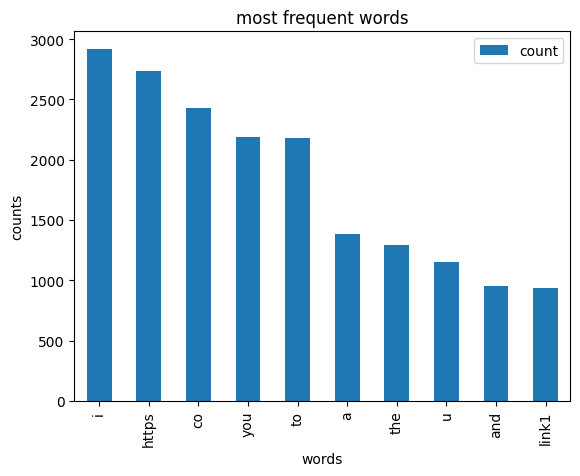

In [520]:
# ploting the most frequent words
freq_words_df = pd.DataFrame(freq_words, columns=['word', 'count'])
freq_words_df.plot(x='word', y='count', kind='bar')
plt.title('most frequent words')
plt.xlabel('words')
plt.ylabel('counts')
plt.show();

# Data Cleaning and Preprocessing

In this section, we will focus on cleaning and filtering the dataset, preparing it for the text classification task. We will implement the following steps:

1. **Remove missing values**:  
   First, we eliminate any rows with missing values to ensure the dataset is complete and consistent.

2. **Filter by text length (Bonus)**:  
   To maintain a uniform dataset, we will filter the text samples by a specified word count range. This ensures that the texts are neither too short to lack context nor too long to introduce unnecessary complexity.

3. **English stopwords loading**:  
   We load a list of English stopwords to filter out commonly used but contextually insignificant words. This is an important step for improving the performance of the model, as stopwords do not contribute valuable information.

4. **Text cleaning**:  
   We apply a series of text cleaning steps to standardize and simplify the text data. This involves:
   
   - **Removing links (URLs)**:  
     Any URLs present in the text are removed as they are not meaningful for classification purposes.
   
   - **Removing special characters and punctuation**:  
     This step removes any non-alphabetical characters, ensuring the text only contains meaningful words.
   
   - **Lowercasing**:  
     All text is converted to lowercase for uniformity and to avoid case sensitivity issues.
   
   - **Removing English stopwords**:  
     Words that are part of the stopwords list are removed, as they do not add value to the classification task.
   
   - **Stemming or Lemmatization**:  
     Either stemming or lemmatization is applied to reduce words to their root or base form, ensuring consistency in word forms.

5. **Final cleanup**:
   Apply the cleanup function to the feature column.

By following these steps, the text will be cleaned, filtered, and ready for tokenization!

In [521]:
df.dtypes

,0
text,object
label,object


In [522]:
lemmatizer = WordNetLemmatizer()

def clean_text(text):

    # # lowercasing
    text = text.lower()

    # romving any url links
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # removing existing emojis
    text = re.sub(r'[^\w\s]', '', text)

    # removing extra spaces or tabs, lines
    text = " ".join(text.split())

    # removing punctuation
    text = re.sub(r'[^\s]', '', text)
    text = re.sub(f"[{re.escape(punctuation)}]", "", text)

    # tokenize
    # removing stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords]

    # lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)


    return text

In [523]:
df['text'].sample(2)

,text
3300,RCT' THNQ Adrian for U text. Rgds Vatian https...
781,"Hmmm ... I thought we said 2 hours slave, not ..."


In [524]:
# st = ISRIStemmer()

# # performing stemming on the text column
# def stem_words(texts):
# 		return [st.stem(text) for text in texts]

In [525]:
df['text'] = df['text'].apply(clean_text)

In [526]:
# check the length of text data
df['text'].str.split().str.len()

,text
0,20
1,6
2,29
3,12
4,14
...,...
5567,31
5568,8
5569,11
5570,26


In [527]:
df['text'].str.split().str.len().min()
df['text'].str.split().str.len().max()

171

In [528]:
# remove any missing values
# even though i checked above for missing values and there were none but i wrote this line of code just as required from me
df.dropna(subset=['text'], inplace=True)

In [529]:
# exclude the mixed labels
df = df[df['label'] != 'Mixed']

In [530]:
# filter by text length
# here i filtered the length of the text to be between 5 and 50 words
df = df[(df['text'].str.split().str.len() >= 5) &
        (df['text'].str.split().str.len() <= 50)]

In [531]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

min_word_count = df['word_count'].min()
min_text = df.loc[df['word_count'] == min_word_count, 'text'].values
print(f"minimum count: {min_word_count} words")

max_word_count = df['word_count'].max()
max_text = df.loc[df['word_count'] == max_word_count, 'text'].values
print(f"max count: {max_word_count} words")


minimum count: 5 words
max count: 50 words


<ipython-input-531-af4ac31d5377>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))


# Tokenization, Padding, and Data Splitting

In this step, we will prepare the text data for input into a model by converting the text into numerical sequences, padding them to a uniform length, and splitting the dataset into training and testing sets. Here's an overview of the steps involved:

1. **Tokenization**:
   We use a tokenizer to convert the cleaned text into numerical sequences. You can use `Tokenizer` tokenizer from `tensorflow.keras.preprocessing.text` package or any other tokenizer you like.

2. **Text to sequences**:
   After fitting the tokenizer on the cleaned text, we transform each text into a sequence of numbers, where each number corresponds to a token (word) in the text.

3. **Padding the sequences**:
   Since different texts may vary in length, we pad the sequences to ensure they all have the same length.

4. **Label encoding**:
   The labels (target values) also need to be converted into numerical form if they are not encoded.

5. **Train-test split**:
   The dataset is divided into training and testing sets. We allocate 80% of the data for training the model and reserve 20% for testing its performance.
   
   - The **training data** consists of the padded sequences used to train the model.
   - The **training labels** are the encoded labels corresponding to the training data.
   - The **testing data** is used to assess the model’s performance after training.
   - The **testing labels** are the encoded labels corresponding to the testing data.

6. **Data shape confirmation**:
   After splitting the data, we print the shape (dimensions) of both the training and testing sets to confirm that the data is properly divided and formatted.

By the end of this step, the text data will be transformed into padded numerical sequences, the labels will be encoded, and the data will be split into training and testing sets for model development and evaluation.

In [532]:
# tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])

In [533]:
# padding
max_length = 50  # i set a max length of what i think its suitable
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

In [534]:
# label encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['label'])

In [535]:
# # oversampling the label column to prevet having the majorty for the ham
# from imblearn.over_sampling import RandomOverSampler
# oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

In [536]:
# spliting the train amnd test sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')

Train shape: (4091, 50), Test shape: (1023, 50)


# Building the Classifier

In this step, you will design and build a NLP Classifier model to classify text data. Below is a breakdown of the key components you'll implement, but it's up to you to decide how to configure them based on your understanding and experimentation:

1. **Model Type**:
   You will use a Sequential model, which allows you to stack layers in a linear sequence.

2. **Input Layer**:
   Define the shape of the input data. Consider the dimensions of your padded sequences and set the input shape accordingly.

3. **Embedding Layer**:
   The embedding layer will convert input tokens (integers) into dense vector representations. You will need to determine the size of the input dimension (based on your vocabulary) and the output dimension (embedding size).

4. **Bidirectional Simple RNN/LSTM Layers**:
   You can add one or more recurrent layers. Consider using Bidirectional layers to capture contextual information from both directions (forward and backward). You can chose SimpleRNN/GRU/LSTM to perform this step.

5. **Dense Layers**:
   Add one or more fully connected (Dense) layers to process the output from the RNN/GRU/LSTM layers.

6. **Output Layer**:
   The output layer should match the type of classification task you're working on. Consider using appropriate activation function with appropriate number of units.

7. **Model Summary**:
   After defining your model architecture, print a summary to review the number of layers, types of layers, and total parameters.

8. **Model Compilation**:
   Finally, compile the model by selecting an optimizer, a loss function, and metrics.

In [537]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam

In [538]:
vocab_size = len(tokenizer.word_index) + 1
embedding_size = 100

In [539]:
# building the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(max_length,)),
    tf.keras.layers.Embedding(vocab_size, 64),
    Dropout(0.9),
    tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(32)),
    Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [540]:
# summary
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (None, 50, 64)              │         564,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_13 (Bidirectional)     │ (None, 64)                  │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,369 (2.18 MB)

 Trainable params: 570,369 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

In [541]:
# compile
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer='Adam',
    metrics=['accuracy']
)

# Defining Batch Size, Creating Datasets, and Training the Model

In this step, you will define the batch size, create TensorFlow Datasets for both training and testing, and train the model. The key elements to consider are outlined below, and it is up to you to choose the specific configurations based on your preferences and experimentation:

1. **Batch Size**:
   Select a batch size for training and testing. The batch size determines how many samples will be processed together in one forward and backward pass during training.

2. **Creating Datasets**:
   Use TensorFlow’s `Dataset.from_tensor_slices()` to create datasets from the training and testing data.

3. **Batching the Datasets**:
   Batch the datasets by grouping the data into batches of the specified size.

4. **Training the Model**:
   Train the model by fitting it on the training dataset for a specified number of epochs. You will also need to provide the validation data to monitor the model’s performance on unseen data during training.

5. **Tracking Training History**:
   During training, the model’s performance metrics (such as loss and accuracy) will be tracked over the epochs, and the results will be stored in the `history` object.

In [542]:
batch_size = 10

In [543]:
# creating tensorFlow datasets for train and test
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

In [544]:
# training the model
history = model.fit(train_dataset, validation_data=test_dataset, epochs=5)

Epoch 1/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.8362 - loss: 0.3985 - val_accuracy: 0.9599 - val_loss: 0.1281
Epoch 2/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9587 - loss: 0.1520 - val_accuracy: 0.9785 - val_loss: 0.0804
Epoch 3/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.9765 - loss: 0.0780 - val_accuracy: 0.9775 - val_loss: 0.0916
Epoch 4/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.9809 - loss: 0.0719 - val_accuracy: 0.9765 - val_loss: 0.1032
Epoch 5/5
410/410 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.9881 - loss: 0.0420 - val_accuracy: 0.9844 - val_loss: 0.0784


# Model Evaluation

Once the model is trained, the next step is to evaluate its performance on the testing dataset.

1. **Evaluate the Model**:
   You will use the `evaluate()` method to assess the model’s performance on the test dataset.

2. **Testing Dataset**:
   Ensure that the testing dataset is properly prepared and batched, just like the training dataset.

4. **Loss Curve**:
   A loss curve plots the loss values for both the training and validation datasets over the epochs.

In [545]:
loss, accuracy = model.evaluate(test_dataset)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9849 - loss: 0.0864
Test Loss: 0.07836131751537323, Test Accuracy: 0.9843597412109375


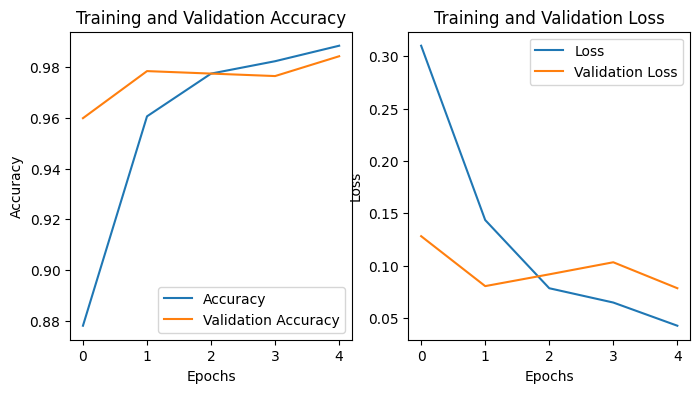

In [546]:
# ploting accuracy and loss

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()

# Model Inference

In this step, you will use the trained model to make predictions on new, unseen data (inference). Here’s an outline of the key points:

1. **Create Test Sample**:
   Create a string to test your modelm the goal here is to give the model Before making predictions, ensure that the new data is preprocessed in the same way as the training data. This includes tokenization, padding, and any other transformations you applied during the data preprocessing step. The data can be single text to see the result of the prediction.

2. **Model Prediction**:
   Use the `predict()` method to feed new samples into the trained model and obtain predictions. The model will output probabilities or predicted class labels based on the type of classification task (binary or multi-class).

3. **Interpreting Predictions**:
   The model will return probabilities for each class.

In [547]:
def predict_sample_text(text):
    cleaned_text = clean_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    prediction = model.predict(padded_sequence)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])
    return predicted_label

# Example prediction
sample_text = 'hello, this is sara'
print(predict_sample_text(sample_text))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
['ham']


# Notebook Question:
- How did you handle text preprocessing? Why did you choose this approach?

- Why did you choose this model design?

- Why did you pick this number of layers or units for the model?

- Why did you select these evaluation methods?

- Does your model show signs of overfitting or underfitting? How do you know?

- What changes could you make to improve the model and fix overfitting or underfitting?

Answer Here:


*   I handled the text preprocessing first by tokenize the text where convert the

*   word to vector then i removed and missing values and after that i filtered the text samples by a specified word count range. This ensures that the texts are neither too short to lack context nor too long to introduce unnecessary complexity.

*  I load a list of English stopwords to improve the performance of the model.

*  In text cleaning process i Any URLs present in the text and removed special characters and punctuation

*  Last part is implementing the lemmatization to convert the words back to its original form without losing and context or meanings

*  I chosed the RNN model beacuse its faster to run and it does the job of training and prediction, i would defintly recommend using LSTM for better accuracy
*  The layers in the rnn model were specified by how large the dataset, as i have over 4000 in training set i think its convinet to have 2 Bidirectional and 2 Dense layers along with chosing 1 output neuros and sigmoind actvation fuction as we want to predict a binary label spam or ham.

*  I chosed accuracy evaluation metrics to taste and visualize the performance of the model

*   Yes my model show i huge signs of overfiting as the gap between the trainin and validation set for both accuarvy and loss is large gap, and the model seem to do better on training set than validation or testing ones
*  I would try to test my model with LSTM rather than RNN and would implement some hyperparameter along with it like early stoping or drop out to prevent over fitting

*   and for better accuarcy and if the time have saved me i would increase the number or epochs


*  i noticed that the ham and spam disturbtion in the label column is not equal in size where the ham	= 4673 values and  spam = 716 values. there is bias in the prediction. i would suggest to handle that befor start training the model or even spliting the dataset



